# Math Camp 2025
SFU Math Camp (Burnaby)  
June 23-27, 2025

This python notebook follows alongside the booklet *Cryptography: A Short Course for Math Camp*.

#### Table of Contents:
<a id='toc'></a>
[Chapter 1: Introduction to Cryptography](#chap1)
* [Section 1.3: The Shift Cipher](#sec1-3)
* [Section 1.4: The Substitution Cipher](#sec1-4)
* [Section 1.5: The Transposition Cipher](#sec1-5)

[Chapter 2: Number Theory](#chap2)

[Chapter 3: Affine Cipher](#chap3)

[Chapter 4: Vigenere Cipher](#chap4)

[Appendix B: Tools for Frequency Analysis](#cryptanalysis)

In [4]:
from crypto import *

## Chapter 1: Introduction to Cryptography
<a id='chap1'></a>

In this python notebook we explore the various ciphers we will be considering. This will give you an opportunity to play with the encryption and decryption process.

### Remainder Operator `%` in Python:

`m % n` returns the remainder of $m$ when divided by $n$. This is an integer $0\le r \le n-1$  such that $m = qn + r$.

In [5]:
32 % 26

6

In [6]:
-5 % 14

9

[back to Table of Contents](#toc)

### Section 1.3: The Shift Cipher
<a id='sec1-3'></a>

First start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.
By default the list of symbols is 

    SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

We define two functions: `shiftEncrypt` and `shiftDecrypt`. Both functions take as input: 
1. `key` - the encryption key for how much each symbol should be shifted to the right along the symbolList
2. `message` - a message to be encrypted/decrypted,  
3. `symbolList` - an (ordered) string of symbols (default `SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`),

**Example: Shift Cipher**

In [7]:
# Example 1:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'  # this is the default alphabet for shift cipher
message = 'THIS IS MY SECRET MESSAGE'
key = 11    # shift characters 11 places to the right in SYMBOLS list.

# encrypt plain text message
translated = shiftEncrypt(key,message,SYMBOLS)
print(translated)

# decrypt cipher text
print(shiftDecrypt(key,translated,SYMBOLS))

ESTD TD XJ DPNCPE XPDDLRP
THIS IS MY SECRET MESSAGE


Now that we have the computer do all the work of encrypting/decrypting we can increase the size of the symbols list to include both upper and lower case letter, digits, spaces, and punctuation. As the next example shows, this makes the cipher text look even more cryptic!

In [8]:
# Example 2:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 !?.'

message = 'This is my secret message'
key = 11    # shift characters 11 places to the right in SYMBOLS list.

# encrypt plain text message
translated = shiftEncrypt(key,message,SYMBOLS)
print(translated)

# decrypt cipher text
print(shiftDecrypt(key,translated,SYMBOLS))

est4Ht4Hx0H4pn3p5Hxp44lrp
This is my secret message


[back to Table of Contents](#toc)

### Section 1.4: Substitution Cipher
<a id='sec1-4'></a>

First start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.
By default the list of symbols is 

    SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

We have two functions: `substitutionEncrypt` and `substitutionDecrypt`, both take as input: 
1. `key` - the encryption key for how the original set of `SYMBOLS` will be permuted (this can be generated by `getRandomKey(SYMBOLS)`)
1. `message` - a message to be encrypted/decrypted,  
1. `symbolList` - an (ordered) string of symbols (default `SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`),

**Example: Substitution Cipher**

In [9]:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

key = getRandomKey(SYMBOLS)
mode = 'encrypt' # Set to 'encrypt' or 'decrypt'.
message = 'THIS IS A SECRET MESSAGE.'
ciphertext = substitutionEncrypt(key,message,SYMBOLS)
print('Using key: {0}'.format(key))
print('The encrypted message is: {0}'.format(ciphertext))

Using key: FRGQBWEAOJCMNZISVPTKDUHLXY
The encrypted message is: KAOT OT F TBGPBK NBTTFEB.


In [10]:
substitutionDecrypt(key,ciphertext,SYMBOLS)

'THIS IS A SECRET MESSAGE.'

The list of symbols can be extended to include upper and lower case, and punctuation.

In [11]:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz1234567890 !?.'

key = getRandomKey(SYMBOLS)
mode = 'encrypt' # Set to 'encrypt' or 'decrypt'.
message = 'THIS IS A SECRET MESSAGE.'
ciphertext = substitutionEncrypt(key,message,SYMBOLS)
print('Using key: {0}'.format(key))
print('The encrypted message is: {0}'.format(ciphertext))

Using key: flNYTJZ7SpGgn!16Ihyes3LH8k?FW Q.tDKRBcoCqVmv9jAEwb4xaUPizduXO52r0M
The encrypted message is: e7Sy2Sy2f2yTNhTe2nTyyfZTM


In [12]:
substitutionDecrypt(key,ciphertext,SYMBOLS)

'THIS IS A SECRET MESSAGE.'

In [13]:
#Example 1.8 from notes booklet:
key = 'XNYAHPOGZQWBTSFLRCVMUEKJDI'
ciphertext = 'MGZVYZLGHCMHJMYXSSFMNHAHYCDLMHA'
substitutionDecrypt(key,ciphertext)

'THISCIPHERTEXTCANNOTBEDECRYPTED'

[back to Table of Contents](#toc)

### Section 1.5: Transposition Cipher
<a id='sec1-5'></a>

We define two functions: `transpositionEncrypt` and `transpositionDecrypt`. Both functions takea as input: 
1. `key` - the encryption key for how many columns the table will have.
2. `message` - a message to be encrypted/decrypted.

**Example: Transposition Cipher** 

In [14]:
message = 'Common sense is not so common.'
key = 8
ciphertext = transpositionEncrypt(key, message)
print(ciphertext+'|')

Cenoonommstmme oo snnio. s s c|


In [15]:
transpositionDecrypt(key,ciphertext)

'Common sense is not so common.'

In [16]:
message = 'there was a tree with apples on it. I neither took apples nor left apples. How many apples were on the tree?'
key = 14
transpositionEncrypt(key, message)

'te hsla heoe epte nrnsphrw  o.leeiitr e  tto Hstwh.olo ra  kewwesaI f ee p atmr?apnp ae lepan teilpyorstep n'

In [17]:
# Example 1.8 from notes
message = 'TWENTYPACESNORTHOFTHEOAKTREETHETREASUREISBURIED'
key = 9
transpositionEncrypt(key,message)

'TETEUEWSHTRDENEHENOOEITRATSYTKRBPHTEUAORARCFESI'

In [18]:
transpositionDecrypt(key,'TETEUEWSHTRDENEHENOOEITRATSYTKRBPHTEUAORARCFESI')

'TWENTYPACESNORTHOFTHEOAKTREETHETREASUREISBURIED'

In [19]:
# Breakout 1.3 from notes booklet:
ciphertext= 'MCHTFIHEAIAH_OILTETEUNNAHN__NSGCECILS_SEMESAEB.A_.NEE_TS_GNTAIHIU_WDCOTAREAAW_GEE_LSIELNL__S_A_OSW_OTTV'
transpositionDecrypt(14,ciphertext)

'MATHEMATICAL_SCIENCE_SHOWS_WHAT_IS._IT_IS_THE_LANGUAGE_OF_UNSEEN_RELATIONS_BETWEEN_THINGS._ADA_LOVELACE'

[back to Table of Contents](#toc)

## Chapter 2: Number Theory
<a id='chap2'></a>

The Division Algorithm: `divmod`

`divmod(m,n)` returns a tuple $(q,r)$ such that $m=qn+r$ where $0\le r \le n-1$.

In [20]:
divmod(35,3)

(11, 2)

In [21]:
q,r = divmod(35,3)
q*3+r

35

This can also be done individually using `//` and `%`.

In [22]:
35//3

11

In [23]:
35%3

2

### Sections 2.7 and 2.9: Number Theory Algorithms

In the `crypto.py` package we have the algorithms to compute: `gcd`, `xgcd`, and $a^{-1} \mod m$, and Euler's phi-function.

Examples:

In [24]:
gcd(124950,68040)

210

In [25]:
xgcd(124950,68040)

(210, 55, -101)

In [26]:
# check
55*124950+(-101)*68040

210

In [27]:
findModInverse(3,26)

9

In [28]:
# check
3*9 % 26

1

In [29]:
eulerPhi(10)

4

[back to Table of Contents](#toc)

## Chapter 3: Affine Cipher
<a id='chap3'></a>

First start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.
By default the list of symbols is 

    SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

We have two functions: `affineEncrypt` and `affineDecrypt`, both take as input: 
1. `keyA`, `keyB` - the encryption key: $ 0 \le keyA, keyB <$ `len(symbolList)` and `keyA` relatively prime to `len(symbolList)`
1. `message` - a message to be encrypted/decrypted,  
1. `symbolList` - an (ordered) string of symbols (default `SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`).

**Example: Affine Cipher** 

In [30]:
# Example 1 of Affine cipher:

SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

message = """THIS IS MY SECRET MESSAGE"""

keyA = 15   # this number must be relatively prime to length of SYMBOLS
keyB = 21
    
translated = affineEncrypt(keyA, keyB, message, SYMBOLS)   

print('Key: %s, %s' % (keyA,keyB))
print('message text:')
print(message) 
print('Encrypted text:')
print(translated)     

Key: 15, 21
message text:
THIS IS MY SECRET MESSAGE
Encrypted text:
UWLF LF TR FDZQDU TDFFVHD


In [31]:
ciphertext = "UWLF LF TR FDZQDU TDFFVHD"
affineDecrypt(keyA, keyB, ciphertext, SYMBOLS)

'THIS IS MY SECRET MESSAGE'

[back to Table of Contents](#toc)

## Chapter 4: Vigenere Cipher
<a id='chap4'></a>

First start with a string of symbols that are to be encoded. Anything not included here will remain unchanged in the ciphertext.
By default the list of symbols is 

    SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

We have two functions: `vigenereEncrypt` and `vigenereDecrypt`, both functions take as input: 
1. `key` - the encryption key: a string of characters from symbolList
1. `message` - a message to be encrypted/decrypted,  
1. `symbolList` - an (ordered) string of symbols (default `SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'`).

**Example: Viginere Cipher**

In [32]:
# Example:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
message = '''THIS IS MY SECRET MESSAGE I WILL ADD A FEW MORE WORDS TO MAKE IT A BIT LONGER'''
key = 'CAMP'

translated = vigenereEncrypt(key, message, SYMBOLS)

print(f'Symbol list: {SYMBOLS}')
print(f'Key: {key}')
print('message text:')
print(message) 
print('Encrypted text:')
print(translated)  

Symbol list: ABCDEFGHIJKLMNOPQRSTUVWXYZ
Key: CAMP
message text:
THIS IS MY SECRET MESSAGE I WILL ADD A FEW MORE WORDS TO MAKE IT A BIT LONGER
Encrypted text:
VHUH KS YN UEOGGT YTUSMVG I IXNL MSF A RTY MAGG WAGFS FD OAWT KT M QKT XDPGQG


In [33]:
vigenereDecrypt(key, translated, SYMBOLS)

'THIS IS MY SECRET MESSAGE I WILL ADD A FEW MORE WORDS TO MAKE IT A BIT LONGER'

**Example 4.2** in notes

In [34]:
SYMBOLS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
message1 = '''THEMANTHEWOMAN'''
message2 = '''THECHILDTHEWOMAN'''
key = 'CIPHER'

translated1 = vigenereEncrypt(key, message1, SYMBOLS)
translated2 = vigenereEncrypt(key, message2, SYMBOLS)

print(f'Symbol list: {SYMBOLS}')
print(f'Key: {key}')
print('message1 text:')
print(message1) 
print('Encrypted text:')
print(translated1) 
print('message2 text:')
print(message2) 
print('Encrypted text:')
print(translated2)   

Symbol list: ABCDEFGHIJKLMNOPQRSTUVWXYZ
Key: CIPHER
message1 text:
THEMANTHEWOMAN
Encrypted text:
VPTTEEVPTDSDCV
message2 text:
THECHILDTHEWOMAN
Encrypted text:
VPTJLZNLIOINQUPU


[back to Table of Contents](#toc)

## Appendix B: Tools for Cryptanalysis
<a id='cryptanalysis'></a>

We now create some tools that will help us in cracking some ciphers. First is a tool that counts the occurrences of each letter in a block of text. The `getLetterCount` function returns a `dictionary` which, in this case, is just an object consisting of the letters of the alphabet (called the *keys*), and associated to each letter a *value*, which is the number of times that letter appeared in the text.  Look at the example below and it should make this rather convoluted description crystal clear. 

**Example:**  We will count the number of occurences of each letter in the message below. We will also show a bar graph of the letter frequencies.

{'A': 135, 'B': 30, 'C': 74, 'D': 58, 'E': 196, 'F': 37, 'G': 39, 'H': 87, 'I': 139, 'J': 2, 'K': 8, 'L': 62, 'M': 58, 'N': 122, 'O': 113, 'P': 36, 'Q': 2, 'R': 106, 'S': 89, 'T': 140, 'U': 37, 'V': 14, 'W': 30, 'X': 3, 'Y': 21, 'Z': 1}


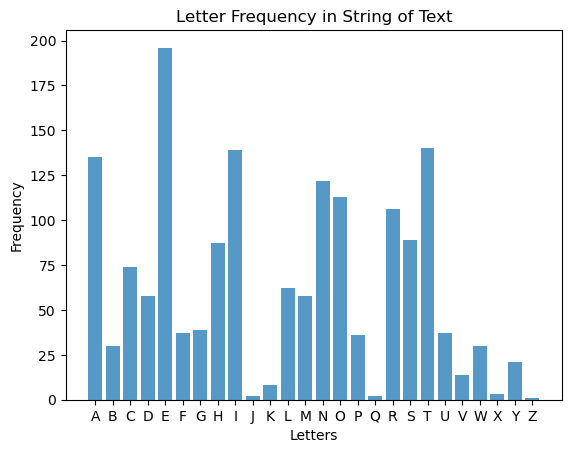

In [35]:
# Example 1:
message = """Alan Mathison Turing was a British mathematician, logician, cryptanalyst, and computer
scientist. He was highly influential in the development of computer science, providing a
formalisation of the concepts of "algorithm" and "computation" with the Turing machine. Turing
is widely considered to be the father of computer science and artificial intelligence. During
World War II, Turing worked for the Government Code and Cypher School (GCCS) at Bletchley Park,
Britain's codebreaking centre. For a time he was head of Hut 8, the section responsible for
German naval cryptanalysis. He devised a number of techniques for breaking German ciphers,
including the method of the bombe, an electromechanical machine that could find settings
for the Enigma machine. After the war he worked at the National Physical Laboratory, where
he created one of the first designs for a stored-program computer, the ACE. In 1948 Turing
joined Max Newman's Computing Laboratory at Manchester University, where he assisted in the
development of the Manchester computers and became interested in mathematical biology. He wrote
a paper on the chemical basis of morphogenesis, and predicted oscillating chemical reactions
such as the Belousov-Zhabotinsky reaction, which were first observed in the 1960s. Turing's
homosexuality resulted in a criminal prosecution in 1952, when homosexual acts were still
illegal in the United Kingdom. He accepted treatment with female hormones (chemical castration)
as an alternative to prison. Turing died in 1954, just over two weeks before his 42nd birthday,
from cyanide poisoning. An inquest determined that his death was suicide; his mother and some
others believed his death was accidental. On 10 September 2009, following an Internet campaign,
British Prime Minister Gordon Brown made an official public apology on behalf of the British
government for "the appalling way he was treated." As of May 2012 a private member's bill was
before the House of Lords which would grant Turing a statutory pardon if enacted."""

letterCounts = getLetterCounts(message)
print(letterCounts)
plotLetterCounts(letterCounts)

{'A': 12, 'B': 1, 'C': 5, 'D': 1, 'E': 3, 'F': 0, 'G': 2, 'H': 3, 'I': 10, 'J': 0, 'K': 0, 'L': 3, 'M': 4, 'N': 8, 'O': 3, 'P': 2, 'Q': 0, 'R': 4, 'S': 6, 'T': 10, 'U': 2, 'V': 0, 'W': 1, 'X': 0, 'Y': 2, 'Z': 0}


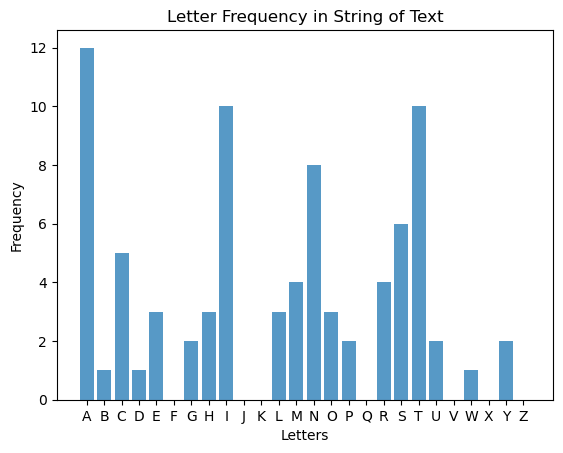

In [36]:
# Example:
message = '''Alan Mathison Turing was a British mathematician, 
logician, cryptanalyst, and computer scientist.'''

letterCounts = getLetterCounts(message)
print(letterCounts)
plotLetterCounts(letterCounts)	

### Kasiski Test - for Vigenere Cipher

Text the was encrypted using the Vigenere cipher may seem like it should be difficult to crack. After all, if we don't know the length of the key then we don't know which characters were encoded using the same shift.  However, considering "words" of length 3 or more appearing in multiple places of the ciphertext it is likely that they came from the same words in the plaintext and just happen to have been encoded in the same way (that is, the spacing between them coincidently matched the length of the key). This is something we can exploit.   

The `findRepeatSequencesSpacings` function in `crypto.py` analyzes the message text and returns all repeated sequences of length 3 to 5 characters along with how far apart they are in the message.  It is quite likely that are key has length which divides all these values.  In other words, the 'key' to unlocking the key length is the gcd.

**Example:** In this example we demonstrate what`findRepeatSequencesSpacings` does.  Consider the ciphertext

    CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE

Let's find all repeated occurrences of strings of length 3 to 5, and report back the distance between successive occurrences of the strings.    

In [37]:
ciphertext = """CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE"""
findRepeatSequencesSpacings(ciphertext)

{'CHR': [165, 235, 275, 285, 70, 110, 120, 40, 50, 10],
 'XXW': [35],
 'XWT': [55],
 'LXF': [109],
 'EMN': [125],
 'MND': [125],
 'ELX': [5],
 'GLX': [30],
 'REM': [49],
 'EMND': [125]}

From this is seems plausible that the keyword has length 5, since most gaps are divisible by 5.

### Index of Coincidence

If two randomly selected characters are taken from a block of English text what is the probability they will be the same character?  (This probability is called the **index of coincidence**.) Well, it turns out that the answer to this question can provide insight into the length of the key for text encrypted with the Vigenere cipher.

The probability that two randomly selected characters are the same is about 0.065 (or 6.5%). How can we use this fact?

In [38]:
# Example
message = '''CHREEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE'''
for k in range(2,7):
    print('key length = {0}, index of coincidence = {1}'.format(k,indexOfCoincidence(message,k)))

key length = 2, index of coincidence = [0.0456, 0.041]
key length = 3, index of coincidence = [0.0432, 0.0497, 0.0471]
key length = 4, index of coincidence = [0.0422, 0.039, 0.0453, 0.0403]
key length = 5, index of coincidence = [0.063, 0.0681, 0.0686, 0.0608, 0.0724]
key length = 6, index of coincidence = [0.0443, 0.0437, 0.0475, 0.0415, 0.049, 0.037]


#### Example of how to use the Index of Coincidence

Now let's figure out what it is actually doing.

Consider the text:

    Puzzles are made of the things that the mathematician, no less than the child, plays with, and dreams and wonders about, for they are made of the things and circumstances of the world he or she lives in.
    
We'll convert it to uppercase and strip away everything but the letters:   

    puzzlesaremadeofthethingsthatthemathematiciannolessthanthechildplayswithanddreamsandwondersaboutfortheyaremadeofthethingsandcircumstancesoftheworldheorshelivesin
    
If we were to select any two positions in the text the probability that the characters at those positions are the same (called the **index of coincidence**) should be around 0.065.  Moreover, if we split up the string into substrings by going through the string from left to right and subsequently dropping each letter into a substring as you would deal out a deck of cards:

    substring1: p l r ...
    substring2: u e e ...
    substring3: z s m ... 
    substring4: z a a ...
    
then for each of these substrings we must also have an index of coincidence of approximately 0.065. 

If we encrypt this text using the Vigenere cipher then each substring that was encrypted using the same 'shift' would also have this same index of coincidence.  On the other hand, mixing together letters encrypted using different shifts would not have this same index of coincidence.  

Let's look at an example:

In [39]:
message = """puzzlesaremadeofthethingsthatthemathematiciannolessthanthechildplayswithanddreamsandwondersaboutfortheyaremadeofthethingsandcircumstancesoftheworldheorshelivesin"""
key = 'ABC'
ciphertext = vigenereEncrypt(key,message)
print(ciphertext)

pvbzmgsbtencdfqfujeujioisujauvhfoaujenctjeibpnpnetuticnujedjimfpmcytyiujaofdsganuaofwppdftsbdovvfpttigybtencdfqfujeujioisbpddkrdwmtvaoeetqfujexqrmfhfqrtjemkvfuio


Suppose we guess that this ciphertext was produced using a key length of 2, then we compute the index of coincidence for each of the two substrings:

In [40]:
indexOfCoincidence(ciphertext,2)

[0.0475, 0.0478]

Neither is close to 0.065 so we likely don't have the correct key length.

Let's loop over key lengths from 2 to 5 and see which one returns values of 0.065 or higher.

In [41]:
for i in range(2,6):
    print('keylength =', i,', index of coincidence =',  indexOfCoincidence(ciphertext,i))

keylength = 2 , index of coincidence = [0.0475, 0.0478]
keylength = 3 , index of coincidence = [0.0748, 0.0832, 0.074]
keylength = 4 , index of coincidence = [0.0549, 0.0487, 0.0372, 0.0551]
keylength = 5 , index of coincidence = [0.0511, 0.0484, 0.0403, 0.0544, 0.0585]


The evidence suggests that the message was encoded with a key length is 3. 

Indeed it was, the key was 'ABC'.